## Name: Yannick Petrus, Raviteja Naraharisetti - [AIS]

Dataset: Bank marketing responses

Link to the dataset: https://www.kaggle.com/datasets/kukuroo3/bank-marketing-response-predict

In [4]:
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
! pip install pandas

  Using cached pandas-1.4.3-cp310-cp310-win_amd64.whl (10.5 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


# Data preparation

In [7]:
df_master = pd.read_csv('./data/train.csv')
df = df_master.copy()
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
5,15046,22,student,single,secondary,no,185,no,no,cellular,8,jul,1,-1,0,unknown,yes
6,15505,53,blue-collar,married,secondary,no,1777,yes,no,cellular,21,nov,5,154,1,failure,yes
7,22341,38,admin.,divorced,secondary,no,74,yes,no,cellular,23,jul,3,-1,0,unknown,no
8,18051,59,management,married,tertiary,no,3342,no,no,cellular,18,mar,2,188,6,other,yes
9,15826,37,housemaid,single,secondary,no,465,yes,no,cellular,18,may,3,-1,0,unknown,yes


In [46]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]] = enc.fit_transform(df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]])
#df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]] = enc.transform(df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]])

In [47]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,9.0,2.0,2.0,0.0,18254,0.0,0.0,0.0,11,8.0,2,-1,0,3.0,0.0
1,22677,26,7.0,2.0,1.0,0.0,512,1.0,1.0,2.0,5,6.0,3,-1,0,3.0,0.0
2,10541,30,4.0,2.0,1.0,0.0,135,0.0,0.0,0.0,14,1.0,2,-1,0,3.0,0.0
3,13689,41,9.0,1.0,3.0,0.0,30,1.0,0.0,0.0,10,5.0,1,-1,0,3.0,0.0
4,11304,27,0.0,2.0,1.0,0.0,321,0.0,1.0,2.0,2,11.0,1,-1,0,3.0,0.0
5,15046,22,8.0,2.0,1.0,0.0,185,0.0,0.0,0.0,8,5.0,1,-1,0,3.0,1.0
6,15505,53,1.0,1.0,1.0,0.0,1777,1.0,0.0,0.0,21,9.0,5,154,1,0.0,1.0
7,22341,38,0.0,0.0,1.0,0.0,74,1.0,0.0,0.0,23,5.0,3,-1,0,3.0,0.0
8,18051,59,4.0,1.0,2.0,0.0,3342,0.0,0.0,0.0,18,7.0,2,188,6,1.0,1.0
9,15826,37,3.0,2.0,1.0,0.0,465,1.0,0.0,0.0,18,8.0,3,-1,0,3.0,1.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         12870 non-null  int64  
 1   age        12870 non-null  int64  
 2   job        12870 non-null  float64
 3   marital    12870 non-null  float64
 4   education  12870 non-null  float64
 5   default    12870 non-null  float64
 6   balance    12870 non-null  int64  
 7   housing    12870 non-null  float64
 8   loan       12870 non-null  float64
 9   contact    12870 non-null  float64
 10  day        12870 non-null  int64  
 11  month      12870 non-null  float64
 12  campaign   12870 non-null  int64  
 13  pdays      12870 non-null  int64  
 14  previous   12870 non-null  int64  
 15  poutcome   12870 non-null  float64
 16  y          12870 non-null  float64
dtypes: float64(10), int64(7)
memory usage: 1.7 MB


In [49]:
X = df[['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = pd.DataFrame(df['y'])

In [51]:
display(X.head())
display(y.head(10))

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,13829,29,9.0,2.0,2.0,0.0,18254,0.0,0.0,0.0,11,8.0,2,-1,0,3.0
1,22677,26,7.0,2.0,1.0,0.0,512,1.0,1.0,2.0,5,6.0,3,-1,0,3.0
2,10541,30,4.0,2.0,1.0,0.0,135,0.0,0.0,0.0,14,1.0,2,-1,0,3.0
3,13689,41,9.0,1.0,3.0,0.0,30,1.0,0.0,0.0,10,5.0,1,-1,0,3.0
4,11304,27,0.0,2.0,1.0,0.0,321,0.0,1.0,2.0,2,11.0,1,-1,0,3.0


,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,1.0
7,0.0
8,1.0
9,1.0


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# df['HouseStyle'] = encoder.fit_transform(df[['HouseStyle']])


# Feature engineering

## Correlation heatmap

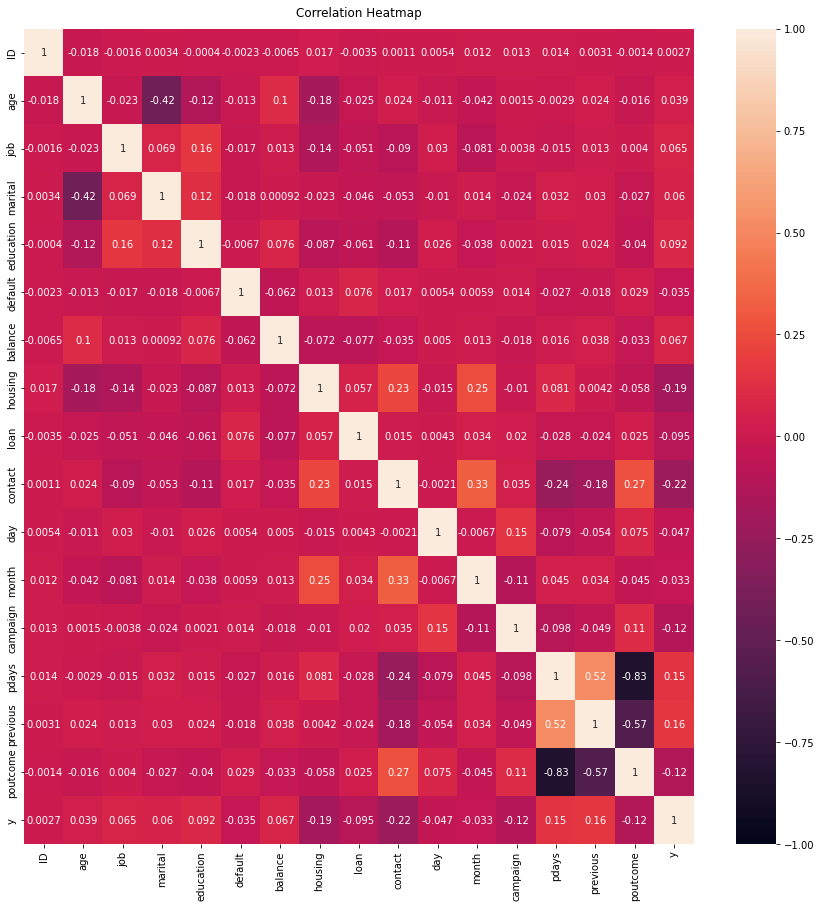

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [91]:
X = X[["education", "housing", "loan", "contact", "pdays", "previous", "poutcome"]]

In [94]:
X.head()

,education,housing,loan,contact,pdays,previous,poutcome
0,2.0,0.0,0.0,0.0,-1,0,3.0
1,1.0,1.0,1.0,2.0,-1,0,3.0
2,1.0,0.0,0.0,0.0,-1,0,3.0
3,3.0,1.0,0.0,0.0,-1,0,3.0
4,1.0,0.0,1.0,2.0,-1,0,3.0


In [95]:
#print(y.count(y))

In [96]:
#fig = plt.pie(y.values.count())

### Checking for null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


## Class balance visualization

no     8903
yes    3967
Name: y, dtype: int64


([<matplotlib.patches.Wedge at 0x7f8287720ad0>,
 [Text(-0.6233235169778338, 0.9063486046673125, 'No'),
  Text(0.623323601836312, -0.9063485463075488, 'Yes')])

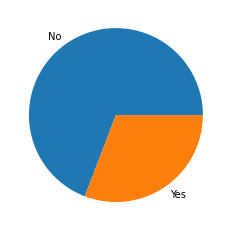

In [104]:
print(df_master['y'].value_counts())
plt.pie(df['y'].value_counts(), labels=['No', 'Yes'])

# Preprocessing

In [8]:
target_col='y'
drop_col=['ID']

In [9]:
X_org=df_master.drop(drop_col+[target_col],axis=1) 

In [ ]:
y = train_csv[target_col].apply(lambda x : 1 if x == 'yes' else 0)

In [ ]:
X_sub_org = test_csv.drop(drop_col, axis=1)

In [12]:
X_org.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown


In [11]:
X_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        12870 non-null  int64 
 1   job        12870 non-null  object
 2   marital    12870 non-null  object
 3   education  12870 non-null  object
 4   default    12870 non-null  object
 5   balance    12870 non-null  int64 
 6   housing    12870 non-null  object
 7   loan       12870 non-null  object
 8   contact    12870 non-null  object
 9   day        12870 non-null  int64 
 10  month      12870 non-null  object
 11  campaign   12870 non-null  int64 
 12  pdays      12870 non-null  int64 
 13  previous   12870 non-null  int64 
 14  poutcome   12870 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.5+ MB


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split